In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_data, trial_data, on='Mouse ID', how="outer")


# Display the data table for preview
combine_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = pd.DataFrame(combine_data.groupby(['Drug', 'Timepoint']).mean())

# # Convert to DataFrame
# mean_tumor_vol = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
mean_tumor_vol.head()
# mean_tumor_vol.columns

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = combine_data.groupby(['Drug', 'Timepoint']).sem()


# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(sem_tumor_volume)

# Preview DataFrame
sem_tumor_volume.head()

# sem_tumor_volume.columns


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [5]:
# Minor Data Munging to Re-Format the Mean Tumor Data Frame

mean_tumor_vol_pivot = mean_tumor_vol.reset_index()
mean_tumor_vol_pivot = mean_tumor_vol_pivot.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_vol_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [27]:
# Data Munging to Re-Format the Standard Error of Tumor Volume Data Frame
sem_tumor_volume_pivot = sem_tumor_volume.reset_index()
sem_tumor_volume_pivot = sem_tumor_volume_pivot.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
sem_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


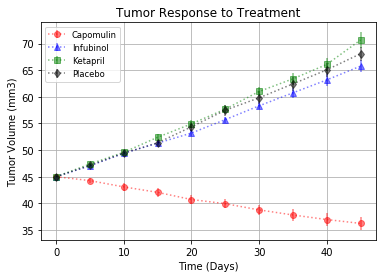

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars) for four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

plt.errorbar(np.arange(0, 50, 5), mean_tumor_vol_pivot['Capomulin'], yerr=sem_tumor_volume_pivot['Capomulin'], 
             fmt="o", color ="r", alpha=0.5, linestyle=':' )

plt.errorbar(np.arange(0, 50, 5), mean_tumor_vol_pivot['Infubinol'], yerr=sem_tumor_volume_pivot['Infubinol'], 
             fmt="^", color ="b", alpha=0.5, linestyle=':')

plt.errorbar(np.arange(0, 50, 5), mean_tumor_vol_pivot['Ketapril'], yerr=sem_tumor_volume_pivot['Ketapril'], 
             fmt="s", color ="g", alpha=0.5, linestyle=':')

plt.errorbar(np.arange(0, 50, 5), mean_tumor_vol_pivot['Placebo'], yerr=sem_tumor_volume_pivot['Placebo'], 
             fmt="d", color ="black", alpha=0.5, linestyle=':')

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Tumor Response to Treatment")

plt.grid()
plt.show()

# Save the Figure
plt.savefig("images/Tumor_Response_to_Treatment.jpeg")


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = combine_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
mean_met_site = met_site.mean()
# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)

# Preview DataFrame
mean_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site = met_site.sem()
# Convert to DataFrame
sem_met_site_df = pd.DataFrame(sem_met_site)

# Preview DataFrame
sem_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_df_pivot = mean_met_site_df.reset_index()
mean_met_site_df_pivot = mean_met_site_df_pivot.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
mean_met_site_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Data Munging to Re-Format the Standard Error of Metastatic Sites Data Frame
sem_met_site_df_pivot = sem_met_site_df.reset_index()
sem_met_site_df_pivot = sem_met_site_df_pivot.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
sem_met_site_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


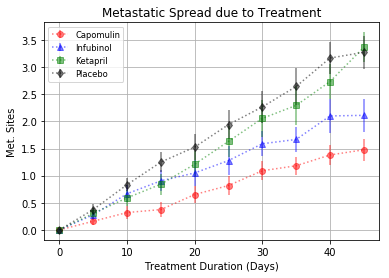

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate the Plot (with Error Bars)

plt.errorbar(np.arange(0, 50, 5), mean_met_site_df_pivot['Capomulin'], yerr=sem_met_site_df_pivot['Capomulin'], 
             fmt="o", color ="r", alpha=0.5, linestyle=':' )

plt.errorbar(np.arange(0, 50, 5), mean_met_site_df_pivot['Infubinol'], yerr=sem_met_site_df_pivot['Infubinol'], 
             fmt="^", color ="b", alpha=0.5, linestyle=':')

plt.errorbar(np.arange(0, 50, 5), mean_met_site_df_pivot['Ketapril'], yerr=sem_met_site_df_pivot['Ketapril'], 
             fmt="s", color ="g", alpha=0.5, linestyle=':')

plt.errorbar(np.arange(0, 50, 5), mean_met_site_df_pivot['Placebo'], yerr=sem_met_site_df_pivot['Placebo'], 
             fmt="d", color ="black", alpha=0.5, linestyle=':')

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Metastatic Spread due to Treatment")

plt.grid()
plt.show()

# Save the Figure
plt.savefig("images/Metastatic_Spread_due_to_Treatment.jpeg")


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_column = combine_data.groupby(['Drug', 'Timepoint'])['Mouse ID']
mice_count = mice_column.count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame
mice_count_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df_pivot = mice_count_df.reset_index()
mice_count_df_pivot = mice_count_df_pivot.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
mice_count_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


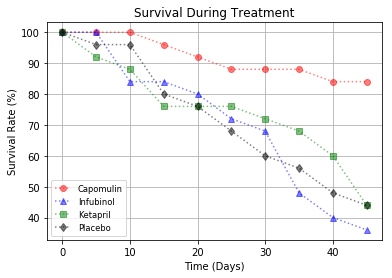

In [15]:
# Generate the Plot (Accounting for percentages)

percent_Cap = (mice_count_df_pivot['Capomulin']/mice_count_df_pivot['Capomulin'][0]) * 100
percent_Infubinol = (mice_count_df_pivot['Infubinol']/mice_count_df_pivot['Infubinol'][0]) * 100
percent_Ketapril = (mice_count_df_pivot['Ketapril']/mice_count_df_pivot['Ketapril'][0]) * 100
percent_Placebo = (mice_count_df_pivot['Placebo']/mice_count_df_pivot['Placebo'][0]) * 100

plt.errorbar(np.arange(0, 50, 5), percent_Cap,
             fmt="o", color ="r", alpha=0.5, linestyle=':' )

plt.errorbar(np.arange(0, 50, 5), percent_Infubinol,
             fmt="^", color ="b", alpha=0.5, linestyle=':')

plt.errorbar(np.arange(0, 50, 5), percent_Ketapril,  
             fmt="s", color ="g", alpha=0.5, linestyle=':')

plt.errorbar(np.arange(0, 50, 5), percent_Placebo, 
             fmt="d", color ="black", alpha=0.5, linestyle=':')

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Survival During Treatment")

plt.grid()
#Save the Figure
plt.savefig("images/Survival_During_Treatment.jpeg")

# Show the Figure
plt.show()

## Summary Bar Graph

In [38]:
# Calculate the percent changes for each drug 
#(Initial Value – New Value)/(Initial Value) * 100
# tumor_percent_change = mean_tumor_vol_pivot.pct_change()
# iloc = mean_tumor_vol_pivot.iloc[-1]
tumor_percent_change = ((mean_tumor_vol_pivot.iloc[-1]-mean_tumor_vol_pivot.iloc[0]) /mean_tumor_vol_pivot.iloc[0])*100
# Display the data to confirm

tumor_percent_change




Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [51]:
# Store all Relevant Percent Changes into a Tuple

# relevant_drugs = [('Capomulin',-19.475303),('Infubinol',46.123472), ('Ketapril',57.028795), ('Placebo', 51.297960 )]
relevant_drugs = (tumor_percent_change['Capomulin'],tumor_percent_change['Infubinol'],tumor_percent_change['Ketapril'],tumor_percent_change['Placebo'] )
relevant_drugs

(-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153)

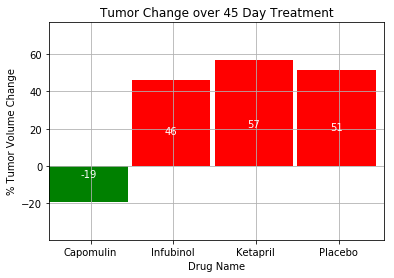

In [130]:
fig, ax = plt.subplots()
x_axis = np.arange(len(relevant_drugs))

# Splice the data between passing and failing drugs
Pass = ax.bar(x_axis[0], relevant_drugs[0], align='edge', width=.95, color='green')
Fail = ax.bar(x_axis[1:], relevant_drugs[1:], align='edge', width=.95, color='red')

# Orient widths. Add labels, tick marks, etc. https://matplotlib.org/3.1.0/api/axes_api.html
ax.set_xticks(x_axis+0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_xlabel('Drug Name')
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change over 45 Day Treatment')
ax.set_xlim(0, len(x_axis)+0.05)
ax.set_ylim(min(relevant_drugs)-20, max(relevant_drugs)+20)
ax.grid()

# Use functions to label the percentages of changes
def label(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .35*height,
                '%d' % int(height),
                ha='center', va='bottom', color = 'white')

label(Pass)
label(Fail)

# Call functions to implement the function calls


# Save the Figure
fig.savefig("images/Tumor_Change.jpeg")

# Show the Figure
fig.show()

## Analytical trends from the data
1. Of the four treatments being observed in this dataset, Capomulin shows a positive outcome by a decrease in tumor volume over the course of 45 days, 19 %, where as Infubinol, Ketapril and Placebo all show an increase the tumor volume, 46%, 57%, and 51%, respectively. 
2. All four treatments show an increase in the number of metastatic sites in the mice over the period of treatment. Although mice treated with Capomulin, increases at a slower rate then the other drugs. 
3. Capomulin is the only drug of the four that show that the survival rate of 85% compared to half that rate for the other three treatments. 

Capomulin should continue to be studied as a treatment for cancer.
